In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import hough

# reference: https://docs.opencv.org/master/d6/d10/tutorial_py_houghlines.html
image_path = 'sudoku.png'
img = cv2.imread(image_path)

# OpenCV
edges_cv = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 100, 200, L2gradient=True)
threshold_cv = 200

# Tensorflow
thetas_tf=tf.range(start=0, limit=180, delta=1, dtype=tf.float32) / 180.0 * np.pi
threshold_tf=tf.constant(threshold_cv, dtype=tf.int32)
edges_tf = tf.convert_to_tensor(edges_cv, dtype=tf.bool)

hough_lines = hough.HoughLines(thetas=thetas_tf, threshold=threshold_tf)

# function to draw line
def draw_hough_lines(image, lines):
    
    for line in np.squeeze(lines):
        rho, theta = line[0], line[1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image, (x1,y1), (x2,y2), (255,0,0), 2)
        
    return image

In [2]:
import timeit

reps = 1000

# Hough lines using OpenCV
print("OpenCV: {:.4f} seconds for {} reps of {}".format(
    timeit.timeit(lambda: cv2.HoughLines(edges_cv, 1, np.pi / 180, threshold_cv), number=reps),
    reps,
    image_path
))

# Hough lines using Tensorflow
print("Tensorflow: {:.4f} seconds for {} reps of {}".format(
    timeit.timeit(lambda: hough_lines(edges_tf), number=reps),
    reps,
    image_path
))

OpenCV: 4.7267 seconds for 1000 reps of sudoku.png
Tensorflow: 9.0237 seconds for 1000 reps of sudoku.png


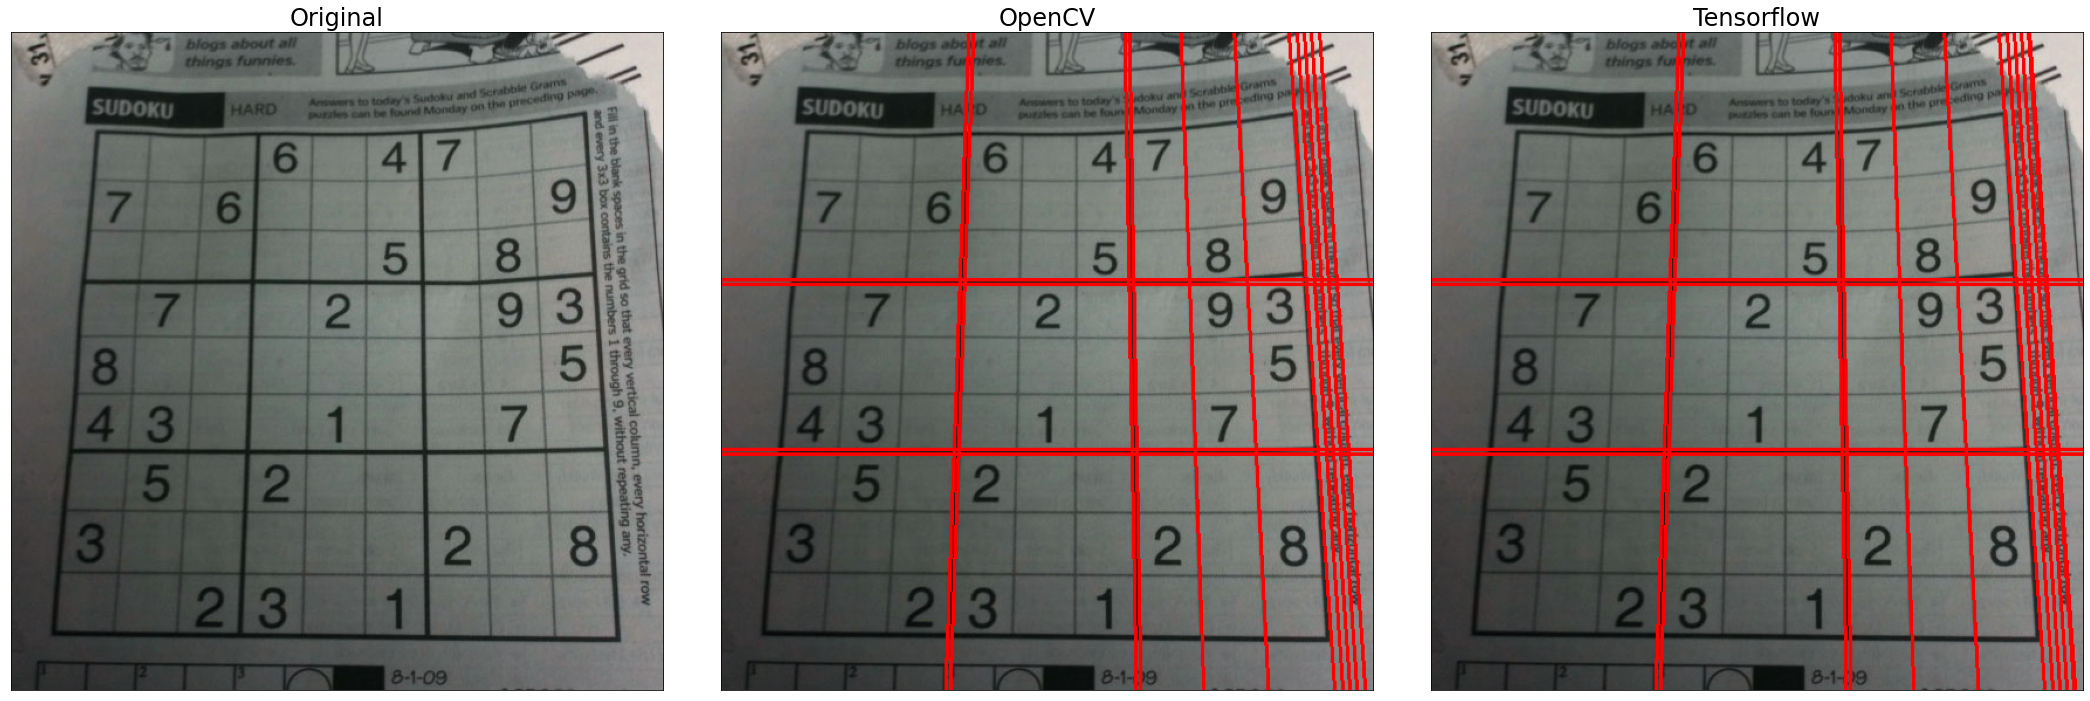

In [3]:
# Hough lines using OpenCV
lines_cv2 = cv2.HoughLines(edges_cv, 1, np.pi/180, threshold_cv)
img_cv2 = draw_hough_lines(img.copy(), lines_cv2)

# Hough lines using Tensorflow
rhos, thetas = hough_lines(edges_tf)
img_tf = draw_hough_lines(img.copy(), np.concatenate([rhos.numpy()[:, None], thetas.numpy()[:, None]], axis=1))

# draw images side by side
plt.figure(figsize=(30,10))

plt.subplot(131),

plt.imshow(img)
plt.title('Original', fontsize=24)
plt.xticks([])
plt.yticks([])

plt.subplot(132),
plt.imshow(img_cv2)
plt.title('OpenCV', fontsize=24)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img_tf)
plt.title('Tensorflow', fontsize=24)
plt.xticks([])
plt.yticks([])

plt.tight_layout(pad=3.0)
plt.savefig('sudoku_lines.png', facecolor='grey', transparent=False)
plt.show()